In [1]:
#importing neccesary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
## Display all the columns of the dataframe

pd.set_option('display.max_columns',None)

In [2]:
df = pd.read_csv('airline_dec_2008_50k.csv')
df.shape

(50000, 30)

In [3]:
df.head(10)

,Unnamed: 0,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,TailNum,ActualElapsedTime,CRSElapsedTime,AirTime,ArrDelay,DepDelay,Origin,Dest,Distance,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
0,1,2008,12,1,1,NaN,1000,NaN,1100,WN,16,N366SW,NaN,60,NaN,NaN,NaN,HOU,DAL,239,NaN,NaN,1,A,0,NaN,NaN,NaN,NaN,NaN
1,2,2008,12,1,1,NaN,1000,NaN,1110,US,2122,NaN,NaN,70,NaN,NaN,NaN,LGA,BOS,185,NaN,NaN,1,A,0,NaN,NaN,NaN,NaN,NaN
2,3,2008,12,1,1,NaN,1000,NaN,1125,MQ,3155,N807MQ,NaN,85,NaN,NaN,NaN,SAN,SJC,417,NaN,NaN,1,B,0,NaN,NaN,NaN,NaN,NaN
3,4,2008,12,1,1,NaN,1000,NaN,1227,EV,4980,N978EV,NaN,87,NaN,NaN,NaN,MEM,CVG,403,NaN,NaN,1,C,0,NaN,NaN,NaN,NaN,NaN
4,5,2008,12,1,1,NaN,1000,NaN,1227,NW,1406,N752NW,NaN,87,NaN,NaN,NaN,ORD,DTW,235,NaN,NaN,1,B,0,NaN,NaN,NaN,NaN,NaN
5,6,2008,12,1,1,NaN,1005,NaN,1055,MQ,4041,N836MQ,NaN,50,NaN,NaN,NaN,ORD,DBQ,147,NaN,NaN,1,C,0,NaN,NaN,NaN,NaN,NaN
6,7,2008,12,1,1,NaN,1015,NaN,1145,MQ,3169,N854MQ,NaN,90,NaN,NaN,NaN,SFO,SNA,372,NaN,NaN,1,B,0,NaN,NaN,NaN,NaN,NaN
7,8,2008,12,1,1,NaN,1020,NaN,1255,MQ,4256,N610MQ,NaN,95,NaN,NaN,NaN,ORD,CHA,501,NaN,NaN,1,C,0,NaN,NaN,NaN,NaN,NaN
8,9,2008,12,1,1,NaN,1029,NaN,1112,YV,7065,N650ML,NaN,43,NaN,NaN,NaN,ORD,MKE,67,NaN,NaN,1,C,0,NaN,NaN,NaN,NaN,NaN
9,10,2008,12,1,1,NaN,1030,NaN,1201,US,1819,NaN,NaN,91,NaN,NaN,NaN,BOS,PHL,280,NaN,NaN,1,A,0,NaN,NaN,NaN,NaN,NaN


In [4]:
#dropping unique identifier feature
print('shape of dataframe before dropping:',df.shape)
df.drop('Unnamed: 0',inplace=True,axis=1)
print('shape of dataframe after dropping',df.shape)

shape of dataframe before dropping: (50000, 30)
shape of dataframe after dropping (50000, 29)


### missing values

In [5]:
#the columns with null values are displayed with the percentage of there missing values
feature_null = [features for features in df.columns if df[features].isnull().sum()>1]
for feature in feature_null:
    print(feature,'\t',df[feature].isnull().sum()/len(df)*100,'% of mussing values')

DepTime 	 34.064 % of mussing values
ArrTime 	 37.164 % of mussing values
TailNum 	 10.888 % of mussing values
ActualElapsedTime 	 37.266 % of mussing values
AirTime 	 37.266 % of mussing values
ArrDelay 	 37.266 % of mussing values
DepDelay 	 34.064 % of mussing values
TaxiIn 	 37.164 % of mussing values
TaxiOut 	 35.083999999999996 % of mussing values
CancellationCode 	 64.442 % of mussing values
CarrierDelay 	 91.686 % of mussing values
WeatherDelay 	 91.686 % of mussing values
NASDelay 	 91.686 % of mussing values
SecurityDelay 	 91.686 % of mussing values
LateAircraftDelay 	 91.686 % of mussing values


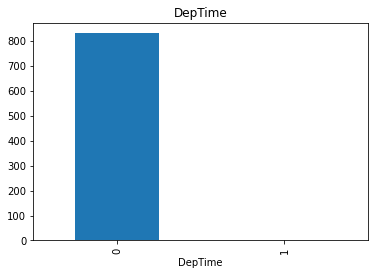

<Figure size 864x360 with 0 Axes>

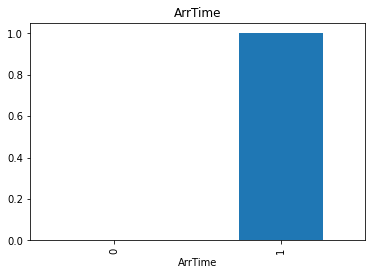

<Figure size 864x360 with 0 Axes>

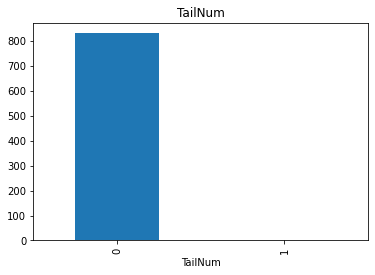

<Figure size 864x360 with 0 Axes>

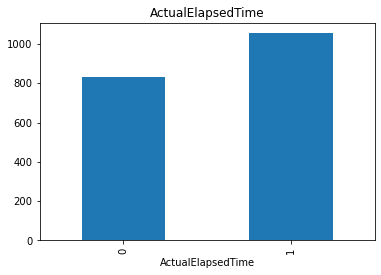

<Figure size 864x360 with 0 Axes>

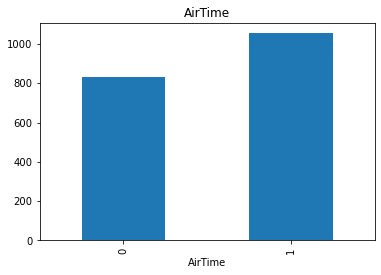

<Figure size 864x360 with 0 Axes>

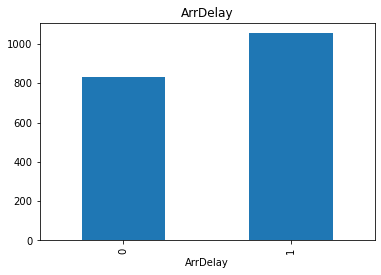

<Figure size 864x360 with 0 Axes>

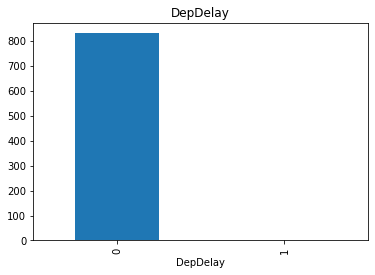

<Figure size 864x360 with 0 Axes>

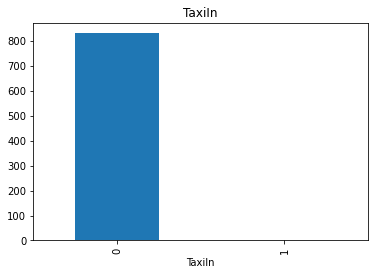

<Figure size 864x360 with 0 Axes>

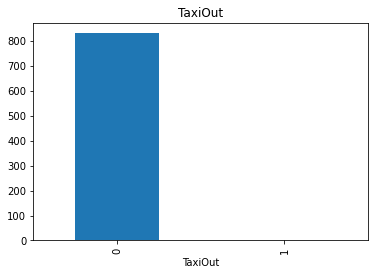

<Figure size 864x360 with 0 Axes>

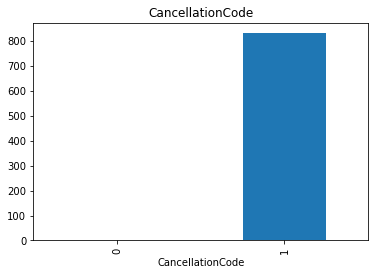

<Figure size 864x360 with 0 Axes>

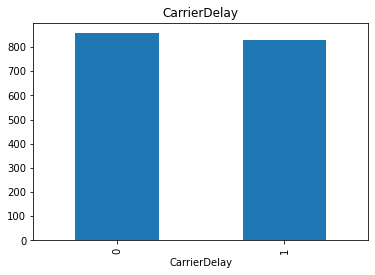

<Figure size 864x360 with 0 Axes>

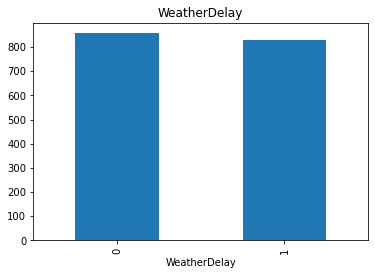

<Figure size 864x360 with 0 Axes>

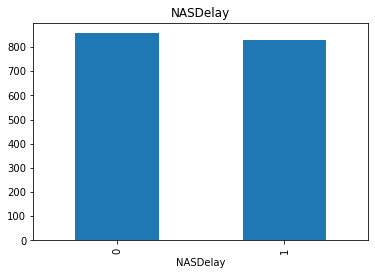

<Figure size 864x360 with 0 Axes>

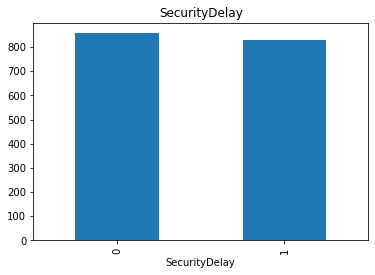

<Figure size 864x360 with 0 Axes>

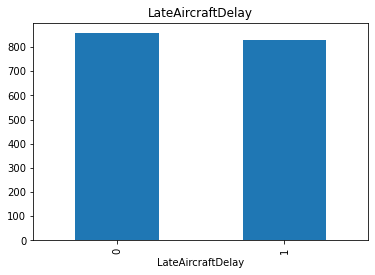

<Figure size 864x360 with 0 Axes>

In [6]:
for feature in feature_null:
    if feature is not 'ArrTime':
        data = df.copy()
        data[feature] = np.where(data[feature].isnull(),1,0)
        data.groupby(feature)['ArrTime'].median().plot.bar()
        plt.title(feature)
        plt.figure(figsize=(12,5))
        plt.show()

In [7]:
#we will drop all the columns which has missing value percentage more than 50
print('shape of dataframe before dropping:',df.shape)
for feature in feature_null:
    if df[feature].isnull().sum()/len(df)*100 > 50:
        df.drop(feature,inplace=True,axis=1)
        feature_null.remove(feature)
print('shape of dataframe after dropping',df.shape)

shape of dataframe before dropping: (50000, 29)
shape of dataframe after dropping (50000, 26)


In [8]:
num_feature = [feature for feature in df.columns if df[feature].dtypes != object]
num_feature

['Year',
 'Month',
 'DayofMonth',
 'DayOfWeek',
 'DepTime',
 'CRSDepTime',
 'ArrTime',
 'CRSArrTime',
 'FlightNum',
 'ActualElapsedTime',
 'CRSElapsedTime',
 'AirTime',
 'ArrDelay',
 'DepDelay',
 'Distance',
 'TaxiIn',
 'TaxiOut',
 'Cancelled',
 'Diverted',
 'CarrierDelay',
 'NASDelay',
 'LateAircraftDelay']

In [9]:
cat_feature = [feature for feature in df.columns if df[feature].dtypes == object]
cat_feature

['UniqueCarrier', 'TailNum', 'Origin', 'Dest']

In [10]:
for feature in cat_feature:
    if feature in feature_null:
        df[feature].fillna(df[feature].mode()[0],inplace=True)
        print('number of missing values in {} is {}'.format(feature,df[feature].isnull().sum()))

number of missing values in TailNum is 0


In [11]:
#dropping because too much classes
print(df.shape)
df.drop(['TailNum','Origin','Dest','UniqueCarrier'],inplace=True,axis=1)
print(df.shape)

(50000, 26)
(50000, 22)


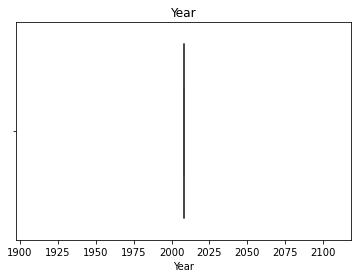

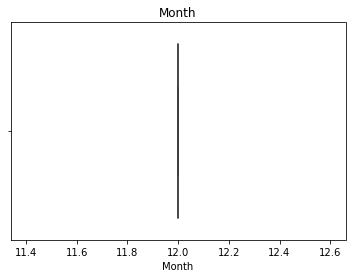

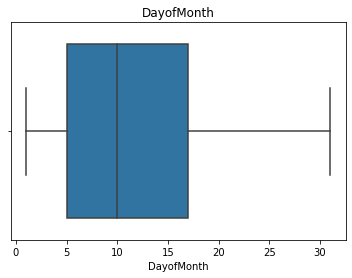

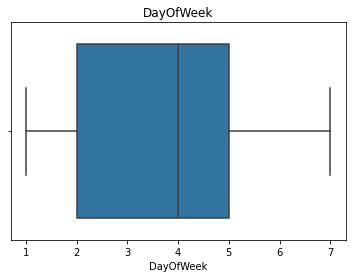

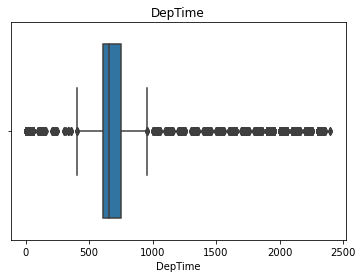

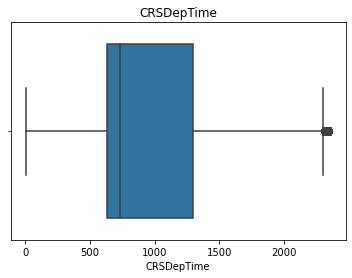

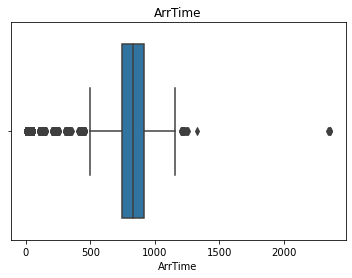

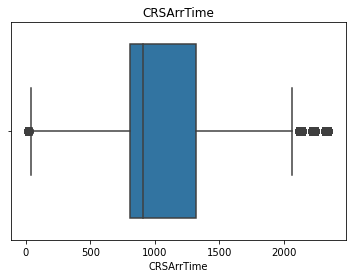

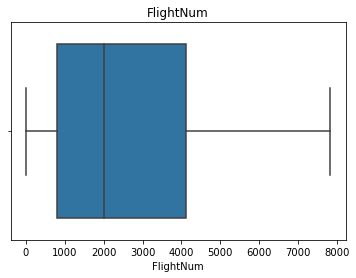

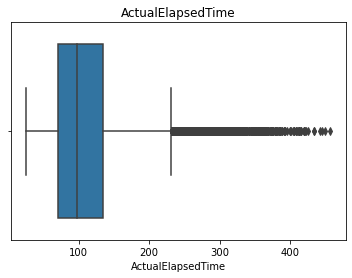

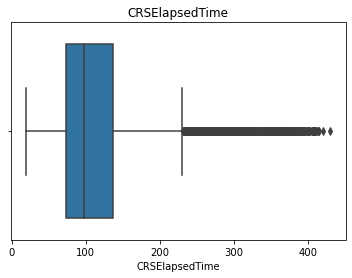

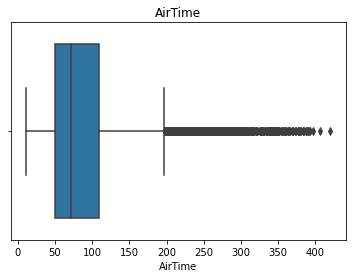

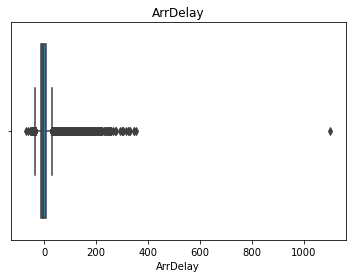

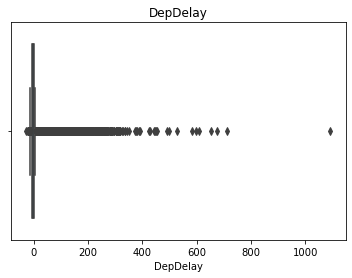

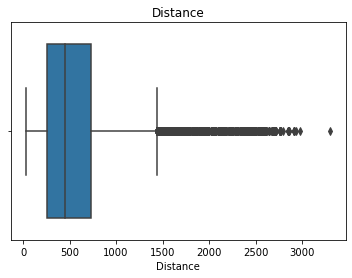

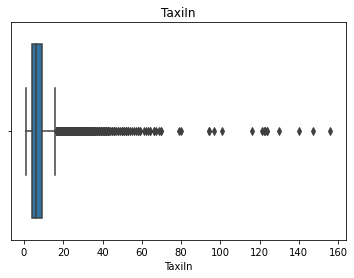

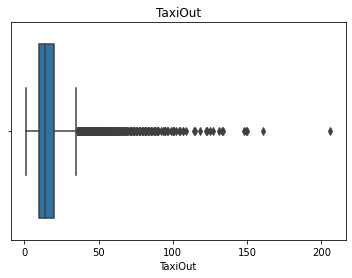

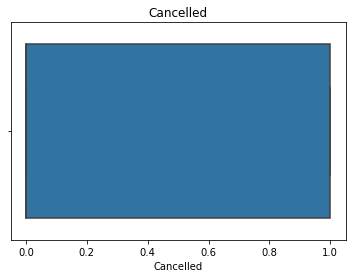

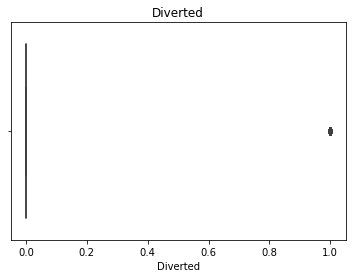

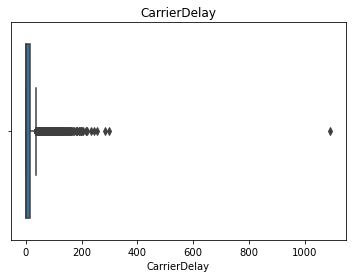

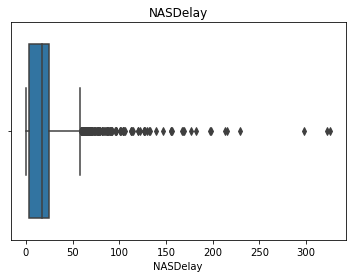

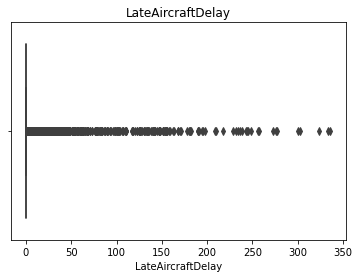

In [12]:
for feature in num_feature:
    sns.boxplot(df[feature])
    plt.title(feature)
    plt.show()

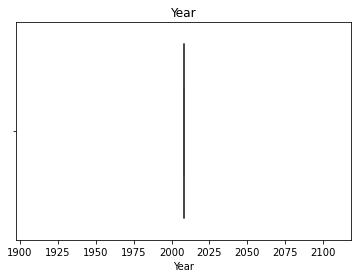

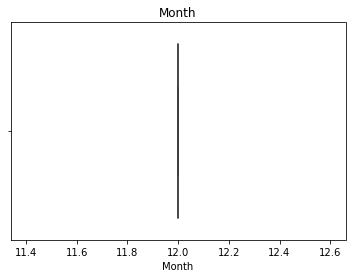

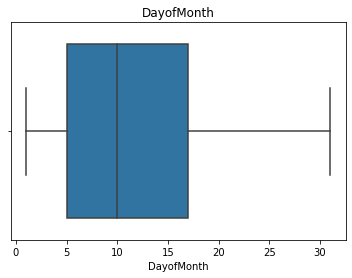

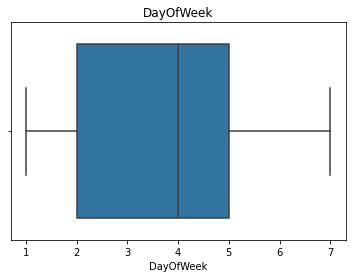

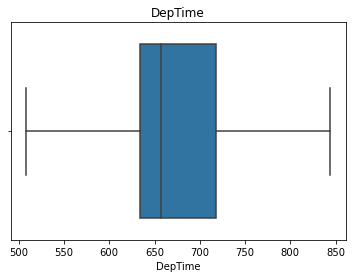

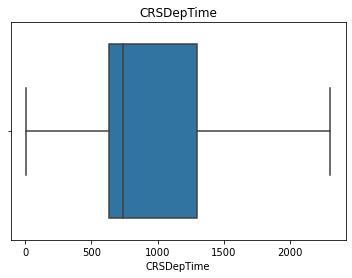

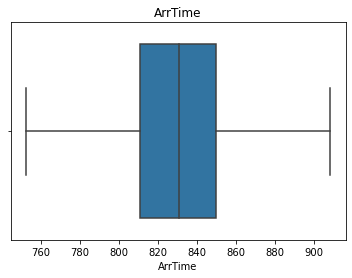

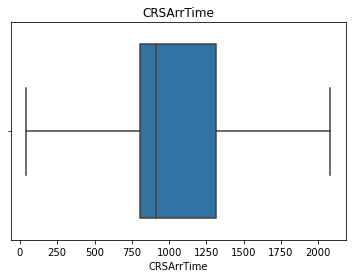

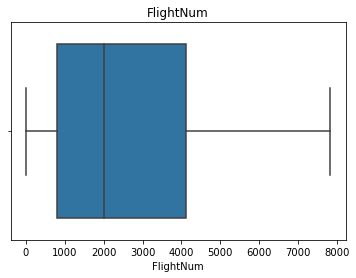

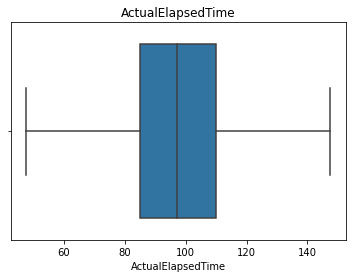

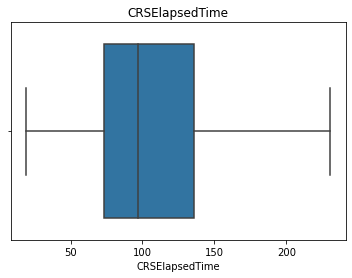

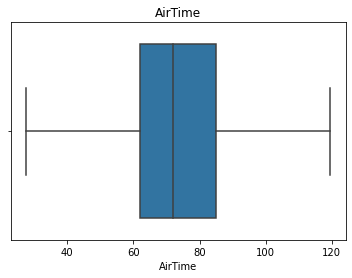

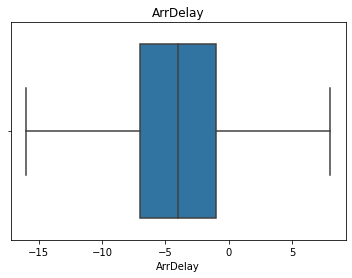

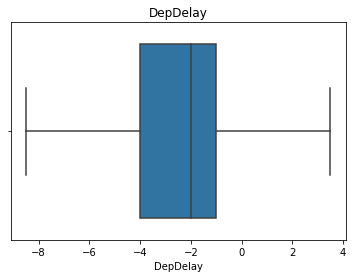

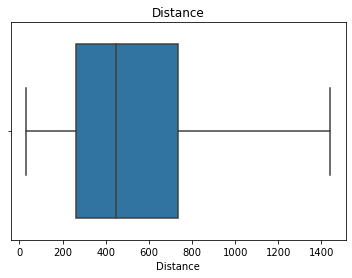

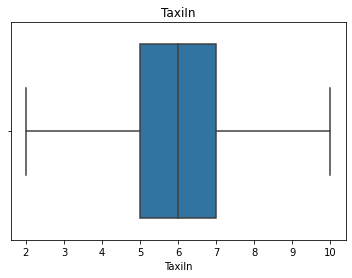

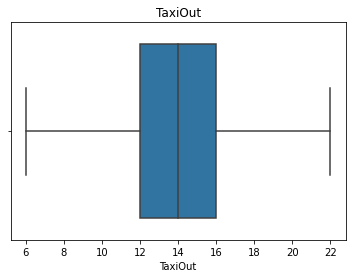

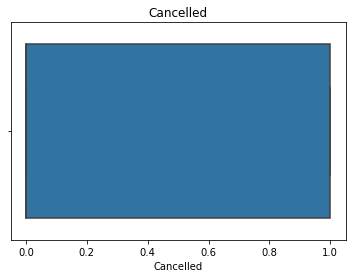

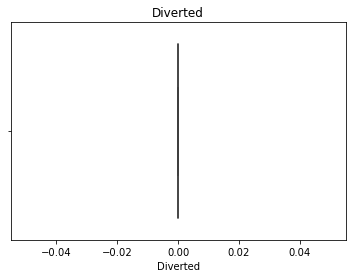

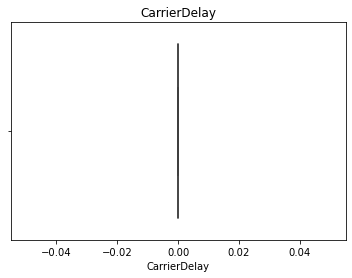

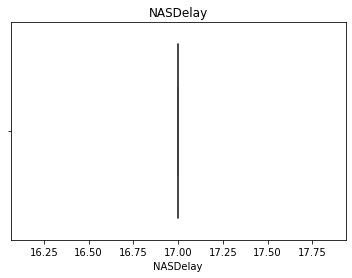

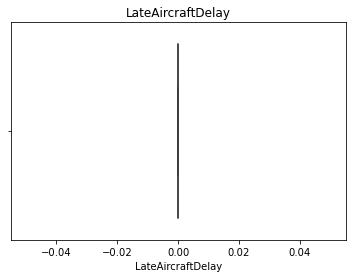

In [15]:
for feature in num_feature:
    IQR = df[feature].quantile(0.75) - df[feature].quantile(0.25)
    high = df[feature].quantile(0.75) + (1.5*IQR)
    low = df[feature].quantile(0.25) - (1.5*IQR)
    if (df[feature] > high).any() or (df[feature]<low).any():
        df[feature].fillna(df[feature].median(),inplace=True)
    else:
        df[feature].fillna(df[feature].mean(),inplace=True)
    x = np.where(df[feature]>high,high,df[feature])
    x = np.where(x<low,low,x)
    df[feature] = pd.DataFrame(x)
    sns.boxplot(df[feature])
    plt.title(feature)
    plt.show()

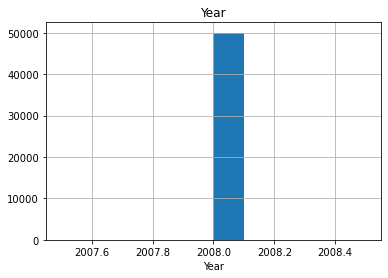

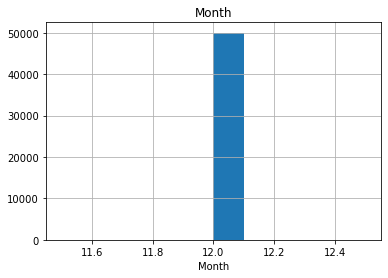

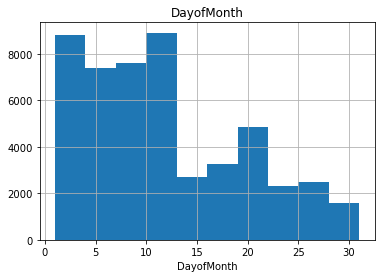

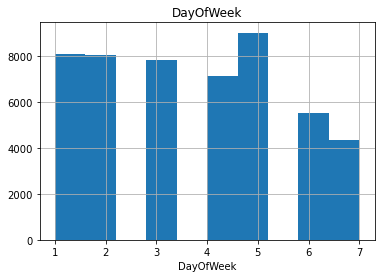

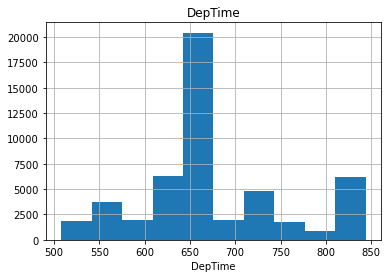

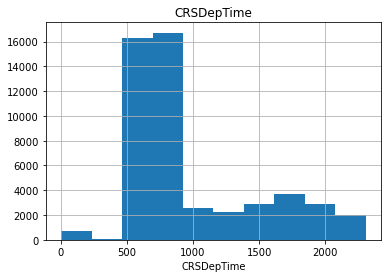

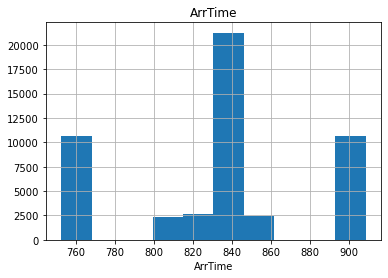

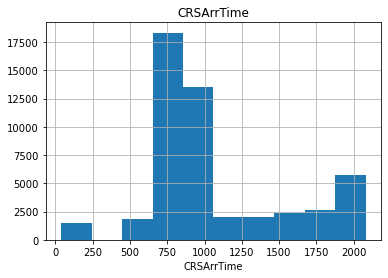

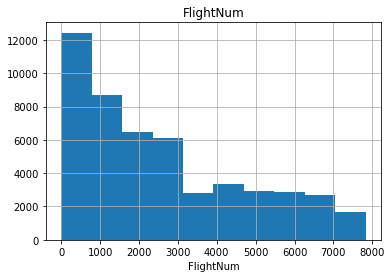

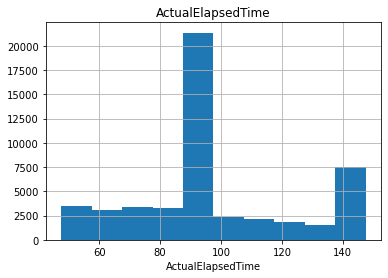

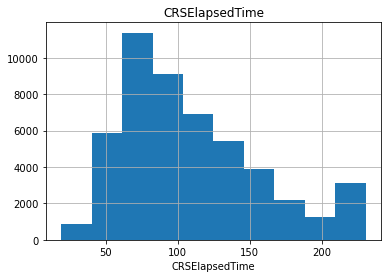

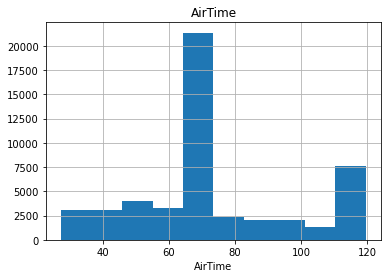

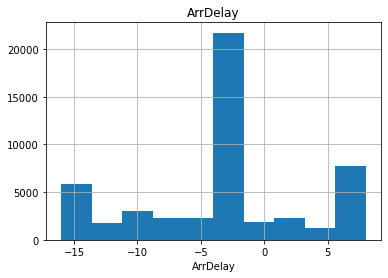

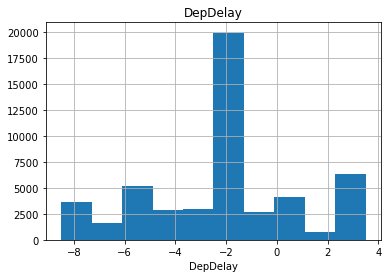

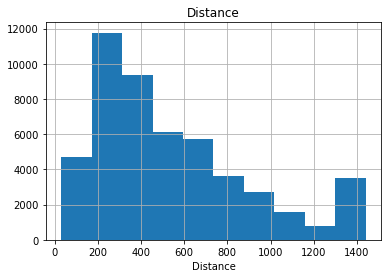

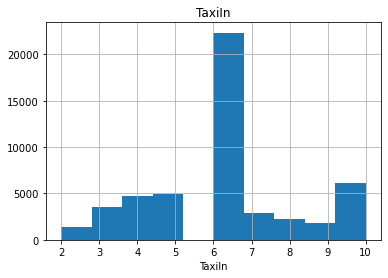

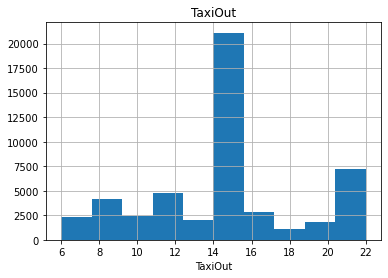

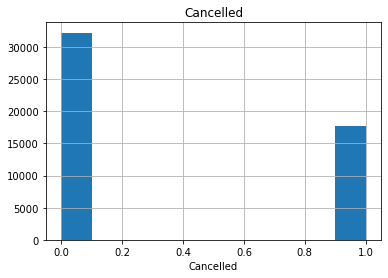

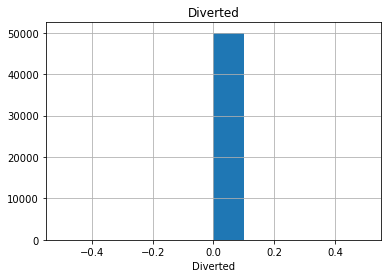

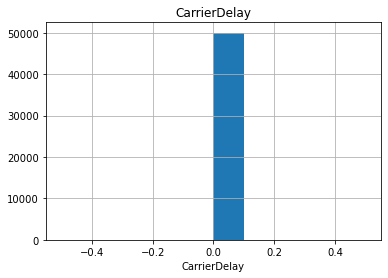

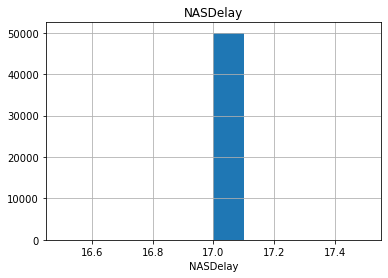

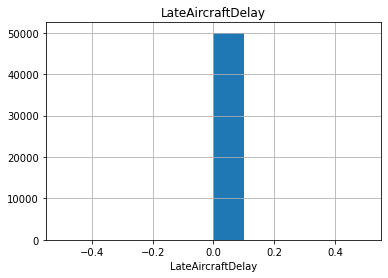

In [16]:
for feature in num_feature:
    data = df.copy()
    data[feature].hist()
    plt.xlabel(feature)
    plt.title(feature)
    plt.show()

In [17]:
#after observing the above distributions we can drop 
print(df.shape)
df.drop(['Year','Month','Diverted','LateAircraftDelay'],inplace=True,axis=1)
print(df.shape)

(50000, 22)
(50000, 18)


In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 18 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   DayofMonth         50000 non-null  float64
 1   DayOfWeek          50000 non-null  float64
 2   DepTime            50000 non-null  float64
 3   CRSDepTime         50000 non-null  float64
 4   ArrTime            50000 non-null  float64
 5   CRSArrTime         50000 non-null  float64
 6   FlightNum          50000 non-null  float64
 7   ActualElapsedTime  50000 non-null  float64
 8   CRSElapsedTime     50000 non-null  float64
 9   AirTime            50000 non-null  float64
 10  ArrDelay           50000 non-null  float64
 11  DepDelay           50000 non-null  float64
 12  Distance           50000 non-null  float64
 13  TaxiIn             50000 non-null  float64
 14  TaxiOut            50000 non-null  float64
 15  Cancelled          50000 non-null  float64
 16  CarrierDelay       500